In [2]:
import pandas as pd
df = pd.read_csv('/Users/masato/Documents/GitHub/ML_Practice/CSV/cinema.csv')
df.head(3)

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227


In [3]:
df.isnull().any(axis = 0)

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

In [5]:
df2 = df.fillna(df.mean())
df2.isnull().any(axis=0)

cinema_id    False
SNS1         False
SNS2         False
actor        False
original     False
sales        False
dtype: bool

<Axes: xlabel='SNS2', ylabel='sales'>

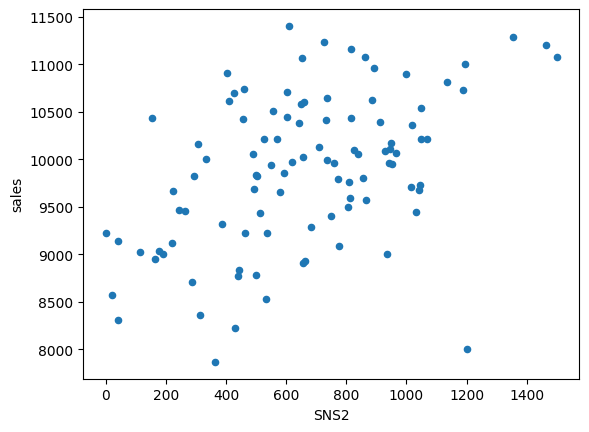

In [6]:
%matplotlib inline

df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales')

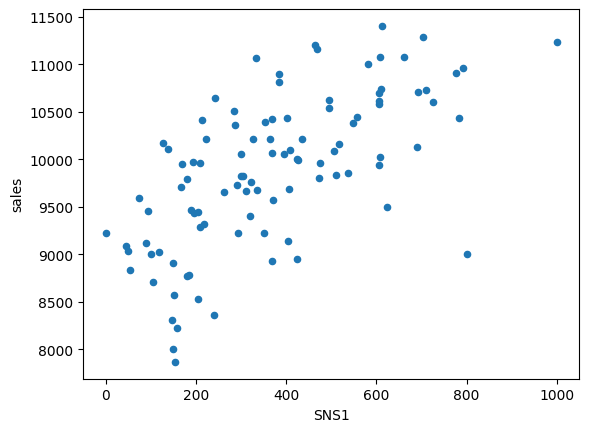

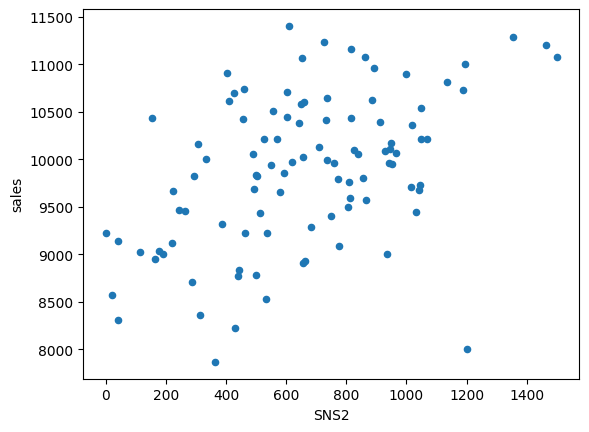

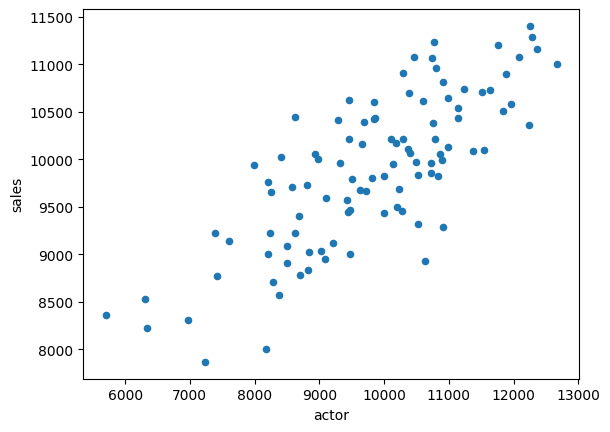

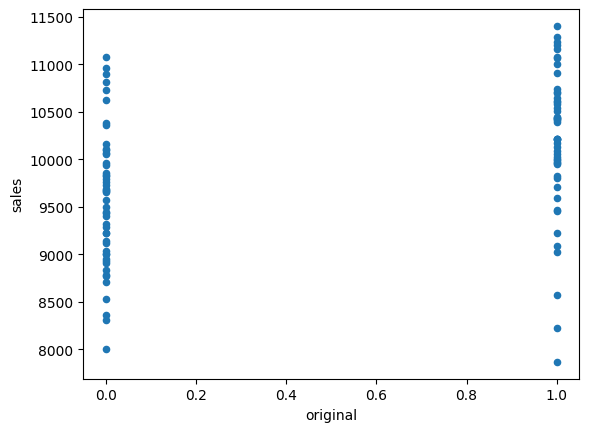

In [9]:
for name in df2.columns:
    if name == 'cinema_id' or name == 'sales':
        continue
    df2.plot(kind = 'scatter', x = name, y = 'sales')

In [10]:
no = df2[(df2['SNS2'] > 1000) & (df2['sales']) < 8500].index
df3 = df2.drop(no,axis=0)

In [13]:
test = pd.DataFrame(
    {'Acolumn': [1,2,3],
      'Bcolumn':[4,5,6]
      }
)

In [14]:
test[test['Acolumn']<2]

,Acolumn,Bcolumn
0,1,4


In [15]:
test['Acolumn']<2

0     True
1    False
2    False
Name: Acolumn, dtype: bool

In [16]:
df[(df['SNS2'] > 1000) & (df["sales"] < 8500)]

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.0,1200,8173.096892,0,8000


In [18]:
no = df2[(df['SNS2'] > 1000) & (df["sales"] < 8500)].index
no

Int64Index([30], dtype='int64')

In [19]:
test.drop(0,axis = 0)

,Acolumn,Bcolumn
1,2,5
2,3,6


In [20]:
test.drop(['Bcolumn'], axis=1)

,Acolumn
0,1
1,2
2,3


In [21]:
df3 = df2.drop(no, axis=0)
df3.shape

(99, 6)

In [22]:
xcol = ['SNS1', 'SNS2', 'actor', 'original']
x = df3[xcol]

y = df3['sales']

In [23]:
df3.loc[0:3, :'actor']

,cinema_id,SNS1,SNS2,actor
0,1375,291.0,1044,8808.994029
1,1000,363.0,568,10290.709370
2,1390,158.0,431,6340.388534
3,1499,261.0,578,8250.485081


In [24]:
x = df3.loc[:,'SNS1':'original']


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(x_train, y_train)

LinearRegression()

In [29]:
new = [[150,700,300,0]]
model.predict(new)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6874.109753])

In [31]:
model.score(x_test,y_test)

0.790388159657009

In [32]:
from sklearn.metrics import mean_absolute_error

pred = model.predict(x_test)

mean_absolute_error(y_pred = pred, y_true = y_test)

277.1223696408626

In [36]:
import pickle

with open ('cinema.pkl', 'wb') as f:
        pickle.dump(model,f)